In [1]:

import os 
import pandas as pd
import numpy as np
import yfinance as yf
import mplfinance as mpf
import matplotlib.pyplot as plt
import ta
import talib
from statsmodels.tsa.stattools import adfuller
import vectorbt as vbt 


from technical_analysis import *
from ALGO_KT1 import Preprocessing_functions as prf


ticker = "JPM"
df = prf.downlaod_symbol_data(ticker, period = "240mo")

#df = pd.read_csv('crypto_data/ETHUSD_60_v1.csv')
#df.columns = df.columns.str.capitalize()

df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,open_low,open_close,open_high,high_low,low_close,high_close,gap
Date,,,,,,,,,,,,,,
2004-06-17 00:00:00-04:00,21.63,21.81,21.54,21.65,5747200,0.0,0.0,0.416089,-0.092464,-0.832178,1.237964,-0.510678,-0.733608,NaN
2004-06-18 00:00:00-04:00,21.70,21.85,21.54,21.60,12953300,0.0,0.0,0.737327,0.460829,-0.691244,1.418764,-0.278552,-1.144165,0.230947
2004-06-21 00:00:00-04:00,21.58,21.69,21.41,21.47,5511700,0.0,0.0,0.787766,0.509731,-0.509731,1.290917,-0.280243,-1.014292,-0.092593
2004-06-22 00:00:00-04:00,21.47,21.48,21.29,21.44,9628200,0.0,0.0,0.838379,0.139730,-0.046577,0.884544,-0.704556,-0.186220,0.000000
2004-06-23 00:00:00-04:00,21.52,21.83,21.51,21.83,9303600,0.0,0.0,0.046468,-1.440520,-1.440520,1.465873,-1.487680,0.000000,0.373134


In [5]:
ticker = "JPM"
df = prf.downlaod_symbol_data(ticker, period = "240mo")

#df = ROC(df)

df = EMA(df)

df = momentum_oscillators(df) ## no vwap 

df = volatility(df)

df = reversal_patterns(df)

df = continuation_patterns(df)

df = magic_doji(df)

df['vwap'] = ta.volume.volume_weighted_average_price(df['High'],
                                                     df['Low'],
                                                     df['Close'],
                                                     df['Volume'])



df['vwap_diff'] = df['Close'] - df['vwap'] # if -ve then VWAP > Close ==> BUY P
df['vwap_pct_diff'] =  (df['vwap_diff']) /  df['Close'].shift(-1)

df = df.dropna()

df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,open_low,open_close,open_high,...,tasuki,rf_three_methods,separating_lines,long_legged_doji,gravestone_doji,dragonfly_doji,tristar_doji,vwap,vwap_diff,vwap_pct_diff
Date,,,,,,,,,,,,,,,,,,,,,
2005-04-01 00:00:00-05:00,20.72,20.91,20.15,20.39,20140200,0.00,0.0,2.750965,1.592664,-0.916988,...,0,0,0,0,0,0,0,21.043155,-0.653155,-0.032159
2005-04-04 00:00:00-04:00,20.25,20.42,20.06,20.31,15639300,0.34,0.0,0.938272,-0.296296,-0.839506,...,0,0,0,0,0,0,0,20.940393,-0.630393,-0.030307
2005-04-05 00:00:00-04:00,20.45,20.91,20.43,20.80,15200900,0.00,0.0,0.097800,-1.711491,-2.249389,...,0,0,0,0,0,0,0,20.891031,-0.091031,-0.004364
2005-04-06 00:00:00-04:00,20.90,21.00,20.82,20.86,10676000,0.00,0.0,0.382775,0.191388,-0.478469,...,0,0,0,0,0,0,0,20.843457,0.016543,0.000790
2005-04-07 00:00:00-04:00,20.90,21.11,20.85,20.93,8304500,0.00,0.0,0.239234,-0.143541,-1.004785,...,0,0,0,100,0,0,0,20.817583,0.112417,0.005418


In [86]:
#df.columns

In [6]:
stats = prf.dist_stats(df, "vwap_diff")
stats_pct = prf.dist_stats(df, "vwap_pct_diff")
stats_pct

,vwap_pct_diff
count,4835.0000
min,-0.4648
max,0.2751
mean,0.0033
median,0.0063
std,0.0385
skew,-1.1278
kurtosis,13.1566


In [99]:
prefs = pd.read_csv("prefs_240311.csv")

In [7]:
prefs = pd.read_csv("prefs_240311.csv")


df1 = {}

for idx, row in prefs.iterrows():
        
    ticker = row["Symbol"].split('\r\n')[0].replace('-', '-P')

    if ticker == "Symbol":
        continue

    df = prf.downlaod_symbol_data(ticker, period = "240mo")

    #df = ROC(df)

    df = EMA(df)

    df = momentum_oscillators(df) ## no vwap 

    df = volatility(df)

    df = reversal_patterns(df)

    df = continuation_patterns(df)

    df = magic_doji(df)

    df['vwap'] = ta.volume.volume_weighted_average_price(df['High'],
                                                        df['Low'],
                                                        df['Close'],
                                                        df['Volume'])



    df['vwap_diff'] = df['Close'] - df['vwap'] # if -ve then VWAP > Close ==> BUY P
    df['vwap_pct_diff'] =  (df['vwap_diff']) /  df['Close'].shift(-1)

    df = df.dropna()

    ### PARAMETERS 
    long_threshold = 0.02
    long_exits = df['vwap_pct_diff'] < 0.0

    short_threshold = -0.20

    df['buy_vwap'] = df['vwap_pct_diff'] >= long_threshold
    df['sell_vwap'] = df['vwap_pct_diff'] >= short_threshold


    long_entries = df['buy_vwap']
    long_exits = df['vwap_pct_diff'] < 0.0


    #print(entries, exits)

    pf = vbt.Portfolio.from_signals(df['Close'], 
                                    long_entries, 
                                    long_exits,
                                    freq="D",
                                    sl_stop = 0.05)
    #print(pf.stats())

    try:
        df1[ticker] = pf.stats()
        #pf.plot().write_image('Backtests/' + ticker+ '.png')
        
    except IndexError:
        print(ticker)
#df[df['vwap_pct_diff'] > 0.07].head()

C:\Users\User\AppData\Local\Temp\ipykernel_5784\4249496335.py:65: UserWarning: Metric 'start' raised an exception
  df1[ticker] = pf.stats()


ALB-PA


AGASF: No data found, symbol may be delisted
C:\Users\User\AppData\Local\Temp\ipykernel_5784\4249496335.py:65: UserWarning: Metric 'start' raised an exception
  df1[ticker] = pf.stats()


AGASF


ATLAF: No data found, symbol may be delisted
C:\Users\User\AppData\Local\Temp\ipykernel_5784\4249496335.py:65: UserWarning: Metric 'start' raised an exception
  df1[ticker] = pf.stats()


ATLAF


AIG-PA: No data found, symbol may be delisted
C:\Users\User\AppData\Local\Temp\ipykernel_5784\4249496335.py:65: UserWarning: Metric 'start' raised an exception
  df1[ticker] = pf.stats()


AIG-PA


AERGP: No data found, symbol may be delisted
C:\Users\User\AppData\Local\Temp\ipykernel_5784\4249496335.py:65: UserWarning: Metric 'start' raised an exception
  df1[ticker] = pf.stats()


AERGP


AVTR-PA: No data found, symbol may be delisted
C:\Users\User\AppData\Local\Temp\ipykernel_5784\4249496335.py:65: UserWarning: Metric 'start' raised an exception
  df1[ticker] = pf.stats()


AVTR-PA


TEMP85: No data found, symbol may be delisted
C:\Users\User\AppData\Local\Temp\ipykernel_5784\4249496335.py:65: UserWarning: Metric 'start' raised an exception
  df1[ticker] = pf.stats()


TEMP85


C:\Users\User\AppData\Local\Temp\ipykernel_5784\4249496335.py:65: UserWarning: Metric 'start' raised an exception
  df1[ticker] = pf.stats()


BANC-PF


TEMP05: No data found, symbol may be delisted
C:\Users\User\AppData\Local\Temp\ipykernel_5784\4249496335.py:65: UserWarning: Metric 'start' raised an exception
  df1[ticker] = pf.stats()


TEMP05


BKMRL: No data found, symbol may be delisted
C:\Users\User\AppData\Local\Temp\ipykernel_5784\4249496335.py:65: UserWarning: Metric 'start' raised an exception
  df1[ticker] = pf.stats()


BKMRL


BCXQL: No data found, symbol may be delisted
C:\Users\User\AppData\Local\Temp\ipykernel_5784\4249496335.py:65: UserWarning: Metric 'start' raised an exception
  df1[ticker] = pf.stats()


BCXQL


TEMP46: No data found, symbol may be delisted
C:\Users\User\AppData\Local\Temp\ipykernel_5784\4249496335.py:65: UserWarning: Metric 'start' raised an exception
  df1[ticker] = pf.stats()


TEMP46


BKNML: No data found, symbol may be delisted
C:\Users\User\AppData\Local\Temp\ipykernel_5784\4249496335.py:65: UserWarning: Metric 'start' raised an exception
  df1[ticker] = pf.stats()


BKNML


C:\Users\User\AppData\Local\Temp\ipykernel_5784\4249496335.py:65: UserWarning: Metric 'start' raised an exception
  df1[ticker] = pf.stats()


BTSGU


BKTD: No data found, symbol may be delisted
C:\Users\User\AppData\Local\Temp\ipykernel_5784\4249496335.py:65: UserWarning: Metric 'start' raised an exception
  df1[ticker] = pf.stats()


BKTD


BKFPF: No data found, symbol may be delisted
C:\Users\User\AppData\Local\Temp\ipykernel_5784\4249496335.py:65: UserWarning: Metric 'start' raised an exception
  df1[ticker] = pf.stats()


BKFPF


C:\Users\User\AppData\Local\Temp\ipykernel_5784\4249496335.py:65: UserWarning: Metric 'start' raised an exception
  df1[ticker] = pf.stats()


BKAAF


C:\Users\User\AppData\Local\Temp\ipykernel_5784\4249496335.py:65: UserWarning: Metric 'start' raised an exception
  df1[ticker] = pf.stats()


CDNUF


C:\Users\User\AppData\Local\Temp\ipykernel_5784\4249496335.py:65: UserWarning: Metric 'start' raised an exception
  df1[ticker] = pf.stats()


CCIA


TEMP52: No data found, symbol may be delisted
C:\Users\User\AppData\Local\Temp\ipykernel_5784\4249496335.py:65: UserWarning: Metric 'start' raised an exception
  df1[ticker] = pf.stats()


TEMP52


EBR.B: No data found, symbol may be delisted
C:\Users\User\AppData\Local\Temp\ipykernel_5784\4249496335.py:65: UserWarning: Metric 'start' raised an exception
  df1[ticker] = pf.stats()


EBR.B


C-PJ: No data found, symbol may be delisted
C:\Users\User\AppData\Local\Temp\ipykernel_5784\4249496335.py:65: UserWarning: Metric 'start' raised an exception
  df1[ticker] = pf.stats()


C-PJ


CBKAP: No data found, symbol may be delisted
C:\Users\User\AppData\Local\Temp\ipykernel_5784\4249496335.py:65: UserWarning: Metric 'start' raised an exception
  df1[ticker] = pf.stats()


CBKAP


C:\Users\User\AppData\Local\Temp\ipykernel_5784\4249496335.py:65: UserWarning: Metric 'start' raised an exception
  df1[ticker] = pf.stats()


CBCPQ


CBJCL: No data found, symbol may be delisted
C:\Users\User\AppData\Local\Temp\ipykernel_5784\4249496335.py:65: UserWarning: Metric 'start' raised an exception
  df1[ticker] = pf.stats()


CBJCL


TEMP48: No data found, symbol may be delisted
C:\Users\User\AppData\Local\Temp\ipykernel_5784\4249496335.py:65: UserWarning: Metric 'start' raised an exception
  df1[ticker] = pf.stats()


TEMP48


DCP-PC: No data found, symbol may be delisted
C:\Users\User\AppData\Local\Temp\ipykernel_5784\4249496335.py:65: UserWarning: Metric 'start' raised an exception
  df1[ticker] = pf.stats()


DCP-PC


C:\Users\User\AppData\Local\Temp\ipykernel_5784\4249496335.py:65: UserWarning: Metric 'start' raised an exception
  df1[ticker] = pf.stats()


ECCF


C:\Users\User\AppData\Local\Temp\ipykernel_5784\4249496335.py:65: UserWarning: Metric 'start' raised an exception
  df1[ticker] = pf.stats()


EFC-PE


C:\Users\User\AppData\Local\Temp\ipykernel_5784\4249496335.py:65: UserWarning: Metric 'start' raised an exception
  df1[ticker] = pf.stats()


EFC-PD


EMICF: No data found, symbol may be delisted
C:\Users\User\AppData\Local\Temp\ipykernel_5784\4249496335.py:65: UserWarning: Metric 'start' raised an exception
  df1[ticker] = pf.stats()


EMICF


C:\Users\User\AppData\Local\Temp\ipykernel_5784\4249496335.py:65: UserWarning: Metric 'start' raised an exception
  df1[ticker] = pf.stats()


EBRZF


C:\Users\User\AppData\Local\Temp\ipykernel_5784\4249496335.py:65: UserWarning: Metric 'start' raised an exception
  df1[ticker] = pf.stats()


ET-PI


TEMP17: No data found, symbol may be delisted
C:\Users\User\AppData\Local\Temp\ipykernel_5784\4249496335.py:65: UserWarning: Metric 'start' raised an exception
  df1[ticker] = pf.stats()


TEMP17


FTBXL: No data found, symbol may be delisted
C:\Users\User\AppData\Local\Temp\ipykernel_5784\4249496335.py:65: UserWarning: Metric 'start' raised an exception
  df1[ticker] = pf.stats()


FTBXL


C:\Users\User\AppData\Local\Temp\ipykernel_5784\4249496335.py:65: UserWarning: Metric 'start' raised an exception
  df1[ticker] = pf.stats()


GLU-PA


GEAPO: No data found, symbol may be delisted
C:\Users\User\AppData\Local\Temp\ipykernel_5784\4249496335.py:65: UserWarning: Metric 'start' raised an exception
  df1[ticker] = pf.stats()


GEAPO


GEAPP: No data found, symbol may be delisted
C:\Users\User\AppData\Local\Temp\ipykernel_5784\4249496335.py:65: UserWarning: Metric 'start' raised an exception
  df1[ticker] = pf.stats()


GEAPP


TEMP19: No data found, symbol may be delisted
C:\Users\User\AppData\Local\Temp\ipykernel_5784\4249496335.py:65: UserWarning: Metric 'start' raised an exception
  df1[ticker] = pf.stats()


TEMP19


C:\Users\User\AppData\Local\Temp\ipykernel_5784\4249496335.py:65: UserWarning: Metric 'start' raised an exception
  df1[ticker] = pf.stats()


GNL-PE


C:\Users\User\AppData\Local\Temp\ipykernel_5784\4249496335.py:65: UserWarning: Metric 'start' raised an exception
  df1[ticker] = pf.stats()


GNL-PD


GLP-PA: No data found, symbol may be delisted
C:\Users\User\AppData\Local\Temp\ipykernel_5784\4249496335.py:65: UserWarning: Metric 'start' raised an exception
  df1[ticker] = pf.stats()


GLP-PA


TEMP23: No data found, symbol may be delisted
C:\Users\User\AppData\Local\Temp\ipykernel_5784\4249496335.py:65: UserWarning: Metric 'start' raised an exception
  df1[ticker] = pf.stats()


TEMP23


C:\Users\User\AppData\Local\Temp\ipykernel_5784\4249496335.py:65: UserWarning: Metric 'start' raised an exception
  df1[ticker] = pf.stats()


GMPFF


C:\Users\User\AppData\Local\Temp\ipykernel_5784\4249496335.py:65: UserWarning: Metric 'start' raised an exception
  df1[ticker] = pf.stats()


HWM-P


C:\Users\User\AppData\Local\Temp\ipykernel_5784\4249496335.py:65: UserWarning: Metric 'start' raised an exception
  df1[ticker] = pf.stats()


INFFF


IFZZF: No data found, symbol may be delisted
C:\Users\User\AppData\Local\Temp\ipykernel_5784\4249496335.py:65: UserWarning: Metric 'start' raised an exception
  df1[ticker] = pf.stats()


IFZZF


JAKP: No data found, symbol may be delisted
C:\Users\User\AppData\Local\Temp\ipykernel_5784\4249496335.py:65: UserWarning: Metric 'start' raised an exception
  df1[ticker] = pf.stats()


JAKP


TEMP14: No data found, symbol may be delisted
C:\Users\User\AppData\Local\Temp\ipykernel_5784\4249496335.py:65: UserWarning: Metric 'start' raised an exception
  df1[ticker] = pf.stats()


TEMP14


JPJQL: No data found, symbol may be delisted
C:\Users\User\AppData\Local\Temp\ipykernel_5784\4249496335.py:65: UserWarning: Metric 'start' raised an exception
  df1[ticker] = pf.stats()


JPJQL


JPMQL: No data found, symbol may be delisted
C:\Users\User\AppData\Local\Temp\ipykernel_5784\4249496335.py:65: UserWarning: Metric 'start' raised an exception
  df1[ticker] = pf.stats()


JPMQL


JPYYL: No data found, symbol may be delisted
C:\Users\User\AppData\Local\Temp\ipykernel_5784\4249496335.py:65: UserWarning: Metric 'start' raised an exception
  df1[ticker] = pf.stats()


JPYYL


C:\Users\User\AppData\Local\Temp\ipykernel_5784\4249496335.py:65: UserWarning: Metric 'start' raised an exception
  df1[ticker] = pf.stats()


KIM-PN


LTSA: No data found, symbol may be delisted
C:\Users\User\AppData\Local\Temp\ipykernel_5784\4249496335.py:65: UserWarning: Metric 'start' raised an exception
  df1[ticker] = pf.stats()


LTSA


TEMP16: No data found, symbol may be delisted
C:\Users\User\AppData\Local\Temp\ipykernel_5784\4249496335.py:65: UserWarning: Metric 'start' raised an exception
  df1[ticker] = pf.stats()


TEMP16


C:\Users\User\AppData\Local\Temp\ipykernel_5784\4249496335.py:65: UserWarning: Metric 'start' raised an exception
  df1[ticker] = pf.stats()


LUXHP


TEMP09: No data found, symbol may be delisted
C:\Users\User\AppData\Local\Temp\ipykernel_5784\4249496335.py:65: UserWarning: Metric 'start' raised an exception
  df1[ticker] = pf.stats()


TEMP09


MTBPP: No data found, symbol may be delisted
C:\Users\User\AppData\Local\Temp\ipykernel_5784\4249496335.py:65: UserWarning: Metric 'start' raised an exception
  df1[ticker] = pf.stats()


MTBPP


AENPP: No data found, symbol may be delisted
C:\Users\User\AppData\Local\Temp\ipykernel_5784\4249496335.py:65: UserWarning: Metric 'start' raised an exception
  df1[ticker] = pf.stats()


AENPP


MFCPF: No data found, symbol may be delisted
C:\Users\User\AppData\Local\Temp\ipykernel_5784\4249496335.py:65: UserWarning: Metric 'start' raised an exception
  df1[ticker] = pf.stats()


MFCPF


MBINP: No data found, symbol may be delisted
C:\Users\User\AppData\Local\Temp\ipykernel_5784\4249496335.py:65: UserWarning: Metric 'start' raised an exception
  df1[ticker] = pf.stats()


MBINP


TEMP49: No data found, symbol may be delisted
C:\Users\User\AppData\Local\Temp\ipykernel_5784\4249496335.py:65: UserWarning: Metric 'start' raised an exception
  df1[ticker] = pf.stats()


TEMP49


TEMP68: No data found, symbol may be delisted
C:\Users\User\AppData\Local\Temp\ipykernel_5784\4249496335.py:65: UserWarning: Metric 'start' raised an exception
  df1[ticker] = pf.stats()


TEMP68


C:\Users\User\AppData\Local\Temp\ipykernel_5784\4249496335.py:65: UserWarning: Metric 'start' raised an exception
  df1[ticker] = pf.stats()


MPLXP


C:\Users\User\AppData\Local\Temp\ipykernel_5784\4249496335.py:65: UserWarning: Metric 'start' raised an exception
  df1[ticker] = pf.stats()


NMPRY


C:\Users\User\AppData\Local\Temp\ipykernel_5784\4249496335.py:65: UserWarning: Metric 'start' raised an exception
  df1[ticker] = pf.stats()


NMPGY


NI-PB: No data found, symbol may be delisted
C:\Users\User\AppData\Local\Temp\ipykernel_5784\4249496335.py:65: UserWarning: Metric 'start' raised an exception
  df1[ticker] = pf.stats()


NI-PB


PARAP: No data found, symbol may be delisted
C:\Users\User\AppData\Local\Temp\ipykernel_5784\4249496335.py:65: UserWarning: Metric 'start' raised an exception
  df1[ticker] = pf.stats()


PARAP


PRTNQ: No data found, symbol may be delisted
C:\Users\User\AppData\Local\Temp\ipykernel_5784\4249496335.py:65: UserWarning: Metric 'start' raised an exception
  df1[ticker] = pf.stats()


PRTNQ


PRTMQ: No data found, symbol may be delisted
C:\Users\User\AppData\Local\Temp\ipykernel_5784\4249496335.py:65: UserWarning: Metric 'start' raised an exception
  df1[ticker] = pf.stats()


PRTMQ


PRTLQ: No data found, symbol may be delisted
C:\Users\User\AppData\Local\Temp\ipykernel_5784\4249496335.py:65: UserWarning: Metric 'start' raised an exception
  df1[ticker] = pf.stats()


PRTLQ


PNCYL: No data found, symbol may be delisted
C:\Users\User\AppData\Local\Temp\ipykernel_5784\4249496335.py:65: UserWarning: Metric 'start' raised an exception
  df1[ticker] = pf.stats()


PNCYL


PWCCF: No data found, symbol may be delisted
C:\Users\User\AppData\Local\Temp\ipykernel_5784\4249496335.py:65: UserWarning: Metric 'start' raised an exception
  df1[ticker] = pf.stats()


PWCCF


C:\Users\User\AppData\Local\Temp\ipykernel_5784\4249496335.py:65: UserWarning: Metric 'start' raised an exception
  df1[ticker] = pf.stats()


O-P


C:\Users\User\AppData\Local\Temp\ipykernel_5784\4249496335.py:65: UserWarning: Metric 'start' raised an exception
  df1[ticker] = pf.stats()


REGCO


C:\Users\User\AppData\Local\Temp\ipykernel_5784\4249496335.py:65: UserWarning: Metric 'start' raised an exception
  df1[ticker] = pf.stats()


REGCP


C:\Users\User\AppData\Local\Temp\ipykernel_5784\4249496335.py:65: UserWarning: Metric 'start' raised an exception
  df1[ticker] = pf.stats()


SCE-PM


SJIV: No data found, symbol may be delisted
C:\Users\User\AppData\Local\Temp\ipykernel_5784\4249496335.py:65: UserWarning: Metric 'start' raised an exception
  df1[ticker] = pf.stats()


SJIV


TEMP13: No data found, symbol may be delisted
C:\Users\User\AppData\Local\Temp\ipykernel_5784\4249496335.py:65: UserWarning: Metric 'start' raised an exception
  df1[ticker] = pf.stats()


TEMP13


STT-PD: No data found, symbol may be delisted
C:\Users\User\AppData\Local\Temp\ipykernel_5784\4249496335.py:65: UserWarning: Metric 'start' raised an exception
  df1[ticker] = pf.stats()


STT-PD


SXN.B: No data found, symbol may be delisted
C:\Users\User\AppData\Local\Temp\ipykernel_5784\4249496335.py:65: UserWarning: Metric 'start' raised an exception
  df1[ticker] = pf.stats()


SXN.B


SXN.C: No data found, symbol may be delisted
C:\Users\User\AppData\Local\Temp\ipykernel_5784\4249496335.py:65: UserWarning: Metric 'start' raised an exception
  df1[ticker] = pf.stats()


SXN.C


SXN.D: No data found, symbol may be delisted
C:\Users\User\AppData\Local\Temp\ipykernel_5784\4249496335.py:65: UserWarning: Metric 'start' raised an exception
  df1[ticker] = pf.stats()


SXN.D


SXN.E: No data found, symbol may be delisted
C:\Users\User\AppData\Local\Temp\ipykernel_5784\4249496335.py:65: UserWarning: Metric 'start' raised an exception
  df1[ticker] = pf.stats()


SXN.E


SXN.F: No data found, symbol may be delisted
C:\Users\User\AppData\Local\Temp\ipykernel_5784\4249496335.py:65: UserWarning: Metric 'start' raised an exception
  df1[ticker] = pf.stats()


SXN.F


TEMP53: No data found, symbol may be delisted
C:\Users\User\AppData\Local\Temp\ipykernel_5784\4249496335.py:65: UserWarning: Metric 'start' raised an exception
  df1[ticker] = pf.stats()


TEMP53


C:\Users\User\AppData\Local\Temp\ipykernel_5784\4249496335.py:65: UserWarning: Metric 'start' raised an exception
  df1[ticker] = pf.stats()


SLFIF


C:\Users\User\AppData\Local\Temp\ipykernel_5784\4249496335.py:65: UserWarning: Metric 'start' raised an exception
  df1[ticker] = pf.stats()


SYF-PB


TEMP82: No data found, symbol may be delisted
C:\Users\User\AppData\Local\Temp\ipykernel_5784\4249496335.py:65: UserWarning: Metric 'start' raised an exception
  df1[ticker] = pf.stats()


TEMP82


C:\Users\User\AppData\Local\Temp\ipykernel_5784\4249496335.py:65: UserWarning: Metric 'start' raised an exception
  df1[ticker] = pf.stats()


TRPEF


C:\Users\User\AppData\Local\Temp\ipykernel_5784\4249496335.py:65: UserWarning: Metric 'start' raised an exception
  df1[ticker] = pf.stats()


TCEYF


C:\Users\User\AppData\Local\Temp\ipykernel_5784\4249496335.py:65: UserWarning: Metric 'start' raised an exception
  df1[ticker] = pf.stats()


TRPPF


C:\Users\User\AppData\Local\Temp\ipykernel_5784\4249496335.py:65: UserWarning: Metric 'start' raised an exception
  df1[ticker] = pf.stats()


TRPRF


TGH-PB: No data found, symbol may be delisted
C:\Users\User\AppData\Local\Temp\ipykernel_5784\4249496335.py:65: UserWarning: Metric 'start' raised an exception
  df1[ticker] = pf.stats()


TGH-PB


TGH-PA: No data found, symbol may be delisted
C:\Users\User\AppData\Local\Temp\ipykernel_5784\4249496335.py:65: UserWarning: Metric 'start' raised an exception
  df1[ticker] = pf.stats()


TGH-PA


TACPF: Period '240mo' is invalid, must be one of ['1mo', '3mo', '6mo', 'ytd', '1y', '2y', '5y', '10y', 'max']
C:\Users\User\AppData\Local\Temp\ipykernel_5784\4249496335.py:65: UserWarning: Metric 'start' raised an exception
  df1[ticker] = pf.stats()


TACPF


TRNPF: No data found, symbol may be delisted
C:\Users\User\AppData\Local\Temp\ipykernel_5784\4249496335.py:65: UserWarning: Metric 'start' raised an exception
  df1[ticker] = pf.stats()


TRNPF


C:\Users\User\AppData\Local\Temp\ipykernel_5784\4249496335.py:65: UserWarning: Metric 'start' raised an exception
  df1[ticker] = pf.stats()


TRTN-PE


C:\Users\User\AppData\Local\Temp\ipykernel_5784\4249496335.py:65: UserWarning: Metric 'start' raised an exception
  df1[ticker] = pf.stats()


TRTN-PD


C:\Users\User\AppData\Local\Temp\ipykernel_5784\4249496335.py:65: UserWarning: Metric 'start' raised an exception
  df1[ticker] = pf.stats()


TRTN-PC


C:\Users\User\AppData\Local\Temp\ipykernel_5784\4249496335.py:65: UserWarning: Metric 'start' raised an exception
  df1[ticker] = pf.stats()


TRTN-PB


C:\Users\User\AppData\Local\Temp\ipykernel_5784\4249496335.py:65: UserWarning: Metric 'start' raised an exception
  df1[ticker] = pf.stats()


TRTN-PA


TEMP08: No data found, symbol may be delisted
C:\Users\User\AppData\Local\Temp\ipykernel_5784\4249496335.py:65: UserWarning: Metric 'start' raised an exception
  df1[ticker] = pf.stats()


TEMP08


TFC-PJ: No data found, symbol may be delisted
C:\Users\User\AppData\Local\Temp\ipykernel_5784\4249496335.py:65: UserWarning: Metric 'start' raised an exception
  df1[ticker] = pf.stats()


TFC-PJ


WFC-PR: No data found, symbol may be delisted
C:\Users\User\AppData\Local\Temp\ipykernel_5784\4249496335.py:65: UserWarning: Metric 'start' raised an exception
  df1[ticker] = pf.stats()


WFC-PR


TEMP07: No data found, symbol may be delisted
C:\Users\User\AppData\Local\Temp\ipykernel_5784\4249496335.py:65: UserWarning: Metric 'start' raised an exception
  df1[ticker] = pf.stats()


TEMP07


TEMP15: No data found, symbol may be delisted
C:\Users\User\AppData\Local\Temp\ipykernel_5784\4249496335.py:65: UserWarning: Metric 'start' raised an exception
  df1[ticker] = pf.stats()


TEMP15


In [122]:
pd.DataFrame(df1, columns = df1.keys())

,SLMNP,ACP-PA,ACR-PC,ACR-PD,MITT-PB,MITT-PC,MITT-PA,AGNCP,AGNCL,AGNCO,...,WVVIP,WTFCP,WTFCM,WELPP,WELPM,XFLT-PA,XOMAO,XOMAP,ZIONO,ZIONP
Start,2017-06-12 00:00:00-04:00,2022-02-24 00:00:00-05:00,2015-03-23 00:00:00-04:00,2022-03-02 00:00:00-05:00,2013-07-11 00:00:00-04:00,2020-06-29 00:00:00-04:00,2013-05-24 00:00:00-04:00,2020-11-17 00:00:00-05:00,2023-06-27 00:00:00-04:00,2020-07-14 00:00:00-04:00,...,2017-06-27 00:00:00-04:00,2021-02-24 00:00:00-05:00,2016-04-08 00:00:00-04:00,2005-04-01 00:00:00-05:00,2013-07-18 00:00:00-04:00,2022-03-23 00:00:00-04:00,2022-01-24 00:00:00-05:00,2021-10-01 00:00:00-04:00,2013-11-15 00:00:00-05:00,2007-10-19 00:00:00-04:00
End,2024-06-13 00:00:00-04:00,2023-09-19 00:00:00-04:00,2024-06-13 00:00:00-04:00,2024-06-13 00:00:00-04:00,2024-06-13 00:00:00-04:00,2024-06-13 00:00:00-04:00,2024-06-13 00:00:00-04:00,2024-06-13 00:00:00-04:00,2024-06-13 00:00:00-04:00,2024-06-14 00:00:00-04:00,...,2024-06-14 00:00:00-04:00,2024-06-14 00:00:00-04:00,2024-06-14 00:00:00-04:00,2024-06-13 00:00:00-04:00,2024-06-13 00:00:00-04:00,2024-06-13 00:00:00-04:00,2024-06-13 00:00:00-04:00,2024-06-14 00:00:00-04:00,2024-06-14 00:00:00-04:00,2024-06-14 00:00:00-04:00
Period,1649 days 00:00:00,370 days 00:00:00,2324 days 00:00:00,575 days 00:00:00,2751 days 00:00:00,997 days 00:00:00,2783 days 00:00:00,898 days 00:00:00,244 days 00:00:00,988 days 00:00:00,...,1754 days 00:00:00,833 days 00:00:00,2061 days 00:00:00,4718 days 00:00:00,1941 days 00:00:00,560 days 00:00:00,601 days 00:00:00,680 days 00:00:00,2662 days 00:00:00,4192 days 00:00:00
Start Value,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
End Value,64.724394,87.831209,230.405762,110.117932,124.038398,187.84754,187.14213,137.415747,94.687375,137.119744,...,0.535202,80.318615,98.115019,5.145007,42.86872,100.0,108.91478,105.170127,65.891677,88.383584
Total Return [%],-35.275606,-12.168791,130.405762,10.117932,24.038398,87.84754,87.14213,37.415747,-5.312625,37.119744,...,-99.464798,-19.681385,-1.884981,-94.854993,-57.13128,0.0,8.91478,5.170127,-34.108323,-11.616416
Benchmark Return [%],59.595319,-4.997882,149.899598,10.06609,113.474388,155.285412,113.249211,42.201295,18.311242,48.809524,...,6.133333,13.087095,51.297899,124.354376,72.102934,10.292135,18.902439,19.652092,108.305921,103.740157
Max Gross Exposure [%],100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,0.0,100.0,100.0,100.0,100.0
Total Fees Paid,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Max Drawdown [%],36.028943,18.232739,31.752458,15.263841,49.474852,13.608318,30.548815,8.221252,8.148821,9.860869,...,99.466142,21.424889,16.522299,94.935205,61.903108,NaN,7.877858,7.919341,49.579137,64.88914


In [89]:
pf.plot().show()

vwap_band_low = 0.1 * (-1)
vwap_band_high = 0.08

profit_low = 0.07 * (-1)
profit_high = 0.06


df['buy_vwap'] = df['vwap_pct_diff'] < vwap_band_low
df['sell_vwap'] = df['vwap_pct_diff'] > vwap_band_high 
df['vwap_strat'] = 0

df['vwap_strat'] = np.where(df["buy_vwap"] == True, 1, df['vwap_strat'])
df['vwap_strat'] = np.where(df["sell_vwap"] == True, -1, df['vwap_strat'])

df.head()

In [ ]:
 ### PARAMETERS 
long_threshold = 0.02
long_exits = df['vwap_pct_diff'] < 0.0

short_threshold = -0.20

df['buy_vwap'] = df['vwap_pct_diff'] >= long_threshold
df['sell_vwap'] = df['vwap_pct_diff'] >= short_threshold


long_entries = df['buy_vwap']
long_exits = df['vwap_pct_diff'] < 0.0


#print(entries, exits)

pf = vbt.Portfolio.from_signals(df['Close'], 
                                long_entries, 
                                long_exits,
                                freq="D",
                                sl_stop = 0.05)
print(pf.stats())

In [2]:
prefs = pd.read_csv("prefs_240311.csv")


df1 = {}

for idx, row in prefs.iterrows():
        
    ticker = row["Symbol"].split('\r\n')[0].replace('-', '-P')

    if ticker == "Symbol":
        continue

    df = prf.downlaod_symbol_data(ticker, period = "240mo")

    #df = ROC(df)

    df = EMA(df)

    df = momentum_oscillators(df) ## no vwap 

    df = volatility(df)

    df = reversal_patterns(df)

    df = continuation_patterns(df)

    df = magic_doji(df)

    df['vwap'] = ta.volume.volume_weighted_average_price(df['High'],
                                                        df['Low'],
                                                        df['Close'],
                                                        df['Volume'])



    df['vwap_diff'] = df['Close'] - df['vwap'] # if -ve then VWAP > Close ==> BUY P
    df['vwap_pct_diff'] =  (df['vwap_diff']) /  df['Close'].shift(-1)

    df = df.dropna()

    ### PARAMETERS 
    long_threshold = 0.02
    long_exits = df['vwap_pct_diff'] < 0.0

    short_threshold = -0.20

    df['buy_vwap'] = df['vwap_pct_diff'] >= long_threshold
    df['sell_vwap'] = df['vwap_pct_diff'] >= short_threshold


    long_entries = df['buy_vwap']
    long_exits = df['vwap_pct_diff'] < 0.0


    #print(entries, exits)

    pf = vbt.Portfolio.from_signals(df['Close'], 
                                    long_entries, 
                                    long_exits,
                                    freq="D",
                                    sl_stop = 0.05)
    #print(pf.stats())

    try:
        df1[ticker] = pf.stats()
        pf.plot().write_image('Backtests/' + ticker+ '.png')
        
    except IndexError:
        print(ticker)
#df[df['vwap_pct_diff'] > 0.07].head()

In [134]:
df2 = pd.DataFrame(df1, columns = df1.keys())

df2

,SLMNP,ACP-PA,ACR-PC,ACR-PD,MITT-PB,MITT-PC,MITT-PA,AGNCP,AGNCL,AGNCO,...,WVVIP,WTFCP,WTFCM,WELPP,WELPM,XFLT-PA,XOMAO,XOMAP,ZIONO,ZIONP
Start,2017-06-12 00:00:00-04:00,2022-02-24 00:00:00-05:00,2015-03-23 00:00:00-04:00,2022-03-02 00:00:00-05:00,2013-07-11 00:00:00-04:00,2020-06-29 00:00:00-04:00,2013-05-24 00:00:00-04:00,2020-11-17 00:00:00-05:00,2023-06-27 00:00:00-04:00,2020-07-14 00:00:00-04:00,...,2017-06-27 00:00:00-04:00,2021-02-24 00:00:00-05:00,2016-04-08 00:00:00-04:00,2005-04-01 00:00:00-05:00,2013-07-18 00:00:00-04:00,2022-03-23 00:00:00-04:00,2022-01-24 00:00:00-05:00,2021-10-01 00:00:00-04:00,2013-11-15 00:00:00-05:00,2007-10-19 00:00:00-04:00
End,2024-06-13 00:00:00-04:00,2023-09-19 00:00:00-04:00,2024-06-13 00:00:00-04:00,2024-06-13 00:00:00-04:00,2024-06-13 00:00:00-04:00,2024-06-13 00:00:00-04:00,2024-06-13 00:00:00-04:00,2024-06-13 00:00:00-04:00,2024-06-13 00:00:00-04:00,2024-06-14 00:00:00-04:00,...,2024-06-14 00:00:00-04:00,2024-06-14 00:00:00-04:00,2024-06-14 00:00:00-04:00,2024-06-13 00:00:00-04:00,2024-06-13 00:00:00-04:00,2024-06-13 00:00:00-04:00,2024-06-13 00:00:00-04:00,2024-06-14 00:00:00-04:00,2024-06-14 00:00:00-04:00,2024-06-14 00:00:00-04:00
Period,1649 days 00:00:00,370 days 00:00:00,2324 days 00:00:00,575 days 00:00:00,2751 days 00:00:00,997 days 00:00:00,2783 days 00:00:00,898 days 00:00:00,244 days 00:00:00,988 days 00:00:00,...,1754 days 00:00:00,833 days 00:00:00,2061 days 00:00:00,4718 days 00:00:00,1941 days 00:00:00,560 days 00:00:00,601 days 00:00:00,680 days 00:00:00,2662 days 00:00:00,4192 days 00:00:00
Start Value,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
End Value,64.724394,87.831209,230.405762,110.117932,124.038398,187.84754,187.14213,137.415747,94.687375,137.119744,...,0.535202,80.318615,98.115019,5.145007,42.86872,100.0,108.91478,105.170127,65.891677,88.383584
Total Return [%],-35.275606,-12.168791,130.405762,10.117932,24.038398,87.84754,87.14213,37.415747,-5.312625,37.119744,...,-99.464798,-19.681385,-1.884981,-94.854993,-57.13128,0.0,8.91478,5.170127,-34.108323,-11.616416
Benchmark Return [%],59.595319,-4.997882,149.899598,10.06609,113.474388,155.285412,113.249211,42.201295,18.311242,48.809524,...,6.133333,13.087095,51.297899,124.354376,72.102934,10.292135,18.902439,19.652092,108.305921,103.740157
Max Gross Exposure [%],100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,0.0,100.0,100.0,100.0,100.0
Total Fees Paid,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Max Drawdown [%],36.028943,18.232739,31.752458,15.263841,49.474852,13.608318,30.548815,8.221252,8.148821,9.860869,...,99.466142,21.424889,16.522299,94.935205,61.903108,NaN,7.877858,7.919341,49.579137,64.88914


In [156]:

df2
sr = df2.loc['Sharpe Ratio', :].to_frame()

sr = sr.replace(np.inf, -999).astype(float)
sr = sr[sr['Sharpe Ratio'] >= 1.2]

sr

,Sharpe Ratio
MITT-PC,1.617146
AGNCP,1.448971
AGNCO,1.448096
ALL-PI,1.396411
NLY-PI,1.467561
BAC-PP,1.492246
BAC-PO,1.247667
BAC-PS,1.548443
BCEXF,1.523317
CWESF,3.820995


In [146]:
sr.columns

Index(['Sharpe Ratio'], dtype='object')

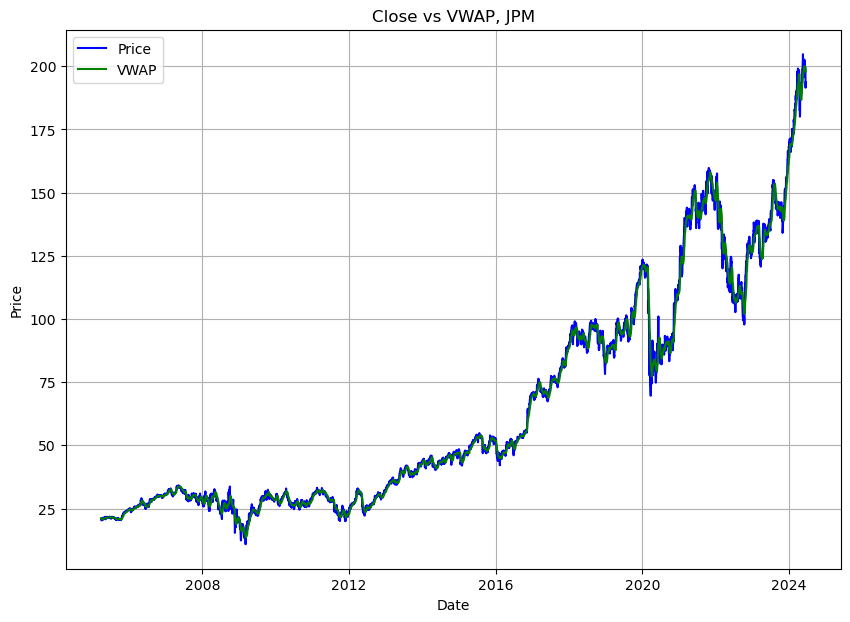

In [91]:
# Create the plot
plt.figure(figsize=(10, 7))  # Set the figure size
plt.plot(df.index, df['Close'], label="Price", color = "blue")
plt.plot(df.index, df['vwap'], label="VWAP", color = 'green')
# Add labels and title
plt.xlabel("Date")
plt.ylabel("Price")
plt.title(f"Close vs VWAP, {ticker}")
# Add legend
plt.legend()
# Show the plot
plt.grid(True)
plt.show()